# Figure 7

In [1]:
from __future__ import division
import warnings
warnings.filterwarnings('ignore')
import networkx as nx
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline

## Global parameters

In [2]:
N = 500 # number of firms
H = N*20 # number of workers
Lambda = .02 # separation rate
sampleSize = 500 # last periods to sample

## Useful functions

In [3]:
def assignH(G, node, h):
    G.node[node]['h'] = h

def uSolNetwork(G):
    N = G.number_of_nodes()
    degs = np.array([G.degree(firm) for firm in range(N)])
    hs = np.array([G.node[node]['h'] for node in range(N)])
    hns = np.array([np.mean(hs[np.array(G.neighbors(i))]) for i in range(N)])
    semiSizes = np.sum(hs*hns*degs/Lambda)
    semiUnemps = np.sum(hs*degs)
    return semiUnemps/(semiUnemps+semiSizes)

def uSolGlobal(G):
    return Lambda/(Lambda + np.mean([G.node[i]['h'] for i in G.nodes()]))

## Computations

In [4]:
# shock on a scale-free network
uSeriesAll = {}

for shock in [.1, .5, .9]:
    usSeries = []
    for sample in range(sampleSize):
        GS = nx.barabasi_albert_graph(N, 2)
        egoS = rd.choice(GS.nodes())
        neighDistS = sorted(nx.single_source_shortest_path_length(GS, egoS).items(), key=lambda (k, v):v)
        seriesS = []
        for numFirms in range(N):       
            hs = np.ones(GS.number_of_nodes())*.5
            [assignH(GS, neighDistS[i][0], hs[i]) for i in range(N)]
            u = uSolNetwork(GS)
            shockedFirms = [neighDistS[numFirm][0] for numFirm in range(numFirms)]
            [assignH(GS, shockedFirm, GS.node[shockedFirm]['h']*shock) for shockedFirm in shockedFirms]
            seriesS.append(uSolNetwork(GS)-u)
        usSeries.append(seriesS)
    uSeriesAll[shock] = usSeries


# effect of shock on GSM
urSeries = []
for shock in [.1, .5, .9]:
    seriesR = []
    for numFirms in range(N):
        hs = np.ones(GS.number_of_nodes())*.5
        [assignH(GS, neighDistS[i][0], hs[i]) for i in range(N)]
        u = uSolGlobal(GS)
        shockedFirms = [neighDistS[numFirm][0] for numFirm in range(numFirms)]
        [assignH(GS, shockedFirm, GS.node[shockedFirm]['h']*shock) for shockedFirm in shockedFirms]
        seriesR.append(uSolGlobal(GS)-u)
    urSeries.append(seriesR)


## Plot results

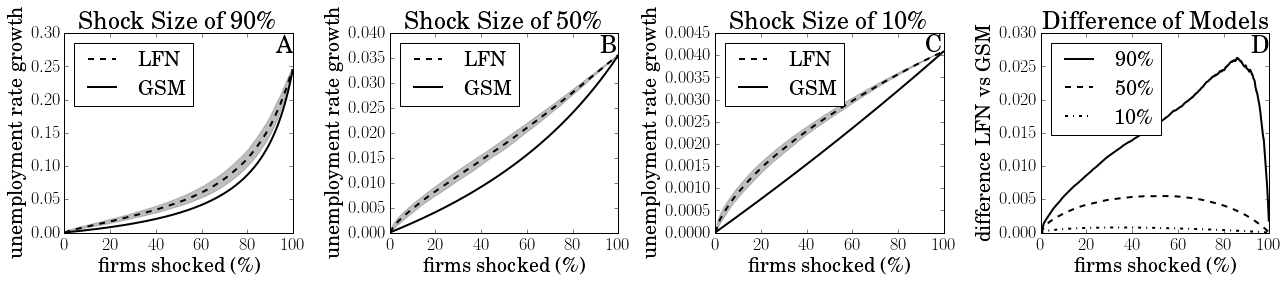

In [24]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig, big_axes = plt.subplots(figsize=(18, 4) , nrows=1, ncols=4, sharey=True) 

x = [i/5 for i in range(500)]

plt.subplot(141)
plt.fill_between(x, np.mean(uSeriesAll[.1], 0)+np.std(uSeriesAll[.1], 0), np.mean(uSeriesAll[.1], 0)-np.std(uSeriesAll[.1], 0), color='grey', alpha=.5)
plt.plot(x, np.mean(uSeriesAll[.1], 0), '--k', linewidth=2)
plt.plot(x, urSeries[0], '-k', linewidth=2)
plt.xlim([0,100])
plt.ylim([0,.3])
plt.text(92, .27, r'A', fontsize=24)
plt.legend([r'LFN', r'GSM'], loc=2, fontsize=20)
plt.ylabel(r'unemployment rate growth', fontsize=20)
plt.xlabel(r'firms shocked (\%)', fontsize=20)
plt.title(r'Shock Size of 90\%', fontsize=24)
plt.tick_params(axis='x', which='major', labelsize=18)
plt.tick_params(axis='y', which='major', labelsize=18)

plt.subplot(142)
plt.fill_between(x, np.mean(uSeriesAll[.5], 0)+np.std(uSeriesAll[.5], 0), np.mean(uSeriesAll[.5], 0)-np.std(uSeriesAll[.5], 0), color='grey', alpha=.5)
plt.plot(x, np.mean(uSeriesAll[.5], 0), '--k', linewidth=2)
plt.plot(x, urSeries[1], '-k', linewidth=2)
plt.xlim([0,100])
plt.ylim([0,.04])
plt.text(92, .036, r'B', fontsize=24)
plt.legend([r'LFN', r'GSM'], loc=2, fontsize=20)
plt.ylabel(r'unemployment rate growth', fontsize=20)
plt.xlabel(r'firms shocked (\%)', fontsize=20)
plt.title(r'Shock Size of 50\%', fontsize=24)
plt.tick_params(axis='x', which='major', labelsize=18)
plt.tick_params(axis='y', which='major', labelsize=18)

plt.subplot(143)
plt.fill_between(x, np.mean(uSeriesAll[.9], 0)+np.std(uSeriesAll[.9], 0), np.mean(uSeriesAll[.9], 0)-np.std(uSeriesAll[.9], 0), color='grey', alpha=.5)
plt.plot(x, np.mean(uSeriesAll[.9], 0), '--k', linewidth=2)
plt.plot(x, urSeries[2], '-k', linewidth=2)
plt.xlim([0,100])
plt.ylim([0,.0045])
plt.text(92, .0041, r'C', fontsize=24)
plt.legend([r'LFN', r'GSM'], loc=2, fontsize=20)
plt.ylabel(r'unemployment rate growth', fontsize=20)
plt.xlabel(r'firms shocked (\%)', fontsize=20)
plt.title(r'Shock Size of 10\%', fontsize=24)
plt.tick_params(axis='x', which='major', labelsize=18)
plt.tick_params(axis='y', which='major', labelsize=18)

plt.subplot(144)
plt.plot(x, np.mean(uSeriesAll[.1], 0)-np.array(urSeries[0]), '-k', linewidth=2)
plt.plot(x, np.mean(uSeriesAll[.5], 0)-np.array(urSeries[1]), '--k', linewidth=2)
plt.plot(x, np.mean(uSeriesAll[.9], 0)-np.array(urSeries[2]), '-.k', linewidth=2)
plt.legend([r'90\%', r'50\%', r'10\%'], loc=2, fontsize=20)
plt.ylabel(r'difference LFN vs GSM', fontsize=20)
plt.xlabel(r'firms shocked (\%)', fontsize=20)
plt.ylim([0, .03])
plt.text(92, .027, r'D', fontsize=24)
plt.title(r'Difference of Models', fontsize=24)
plt.tick_params(axis='x', which='major', labelsize=18)
plt.tick_params(axis='y', which='major', labelsize=18)

plt.tight_layout()